Using TensorFlow backend.


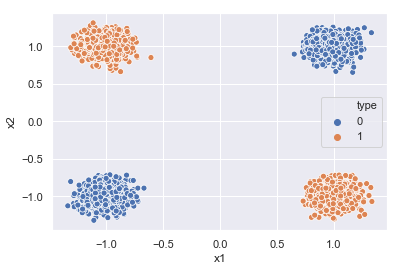

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
import matplotlib
import seaborn as sns; sns.set()
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

# initiating random number
np.random.seed(11)

#### Creating the dataset

# mean and standard deviation for the x belonging to the first class
mu_x1, sigma_x1 = 0, 0.1

# constat to make the second distribution different from the first
# x1_mu_diff, x2_mu_diff, x3_mu_diff, x4_mu_diff = 0.5, 0.5, 0.5, 0.5
x1_mu_diff, x2_mu_diff, x3_mu_diff, x4_mu_diff = 0, 1, 0, 1

# creating the first distribution
d1 = pd.DataFrame({'x1': np.random.normal(mu_x1, sigma_x1, 1000) + 1,
                   'x2': np.random.normal(mu_x1, sigma_x1, 1000) + 1,
                   'type': 0})

d2 = pd.DataFrame({'x1': np.random.normal(mu_x1, sigma_x1, 1000) + 1,
                   'x2': np.random.normal(mu_x1, sigma_x1, 1000) - 1,
                   'type': 1})

d3 = pd.DataFrame({'x1': np.random.normal(mu_x1, sigma_x1, 1000) - 1,
                   'x2': np.random.normal(mu_x1, sigma_x1, 1000) - 1,
                   'type': 0})

d4 = pd.DataFrame({'x1': np.random.normal(mu_x1, sigma_x1, 1000) - 1,
                   'x2': np.random.normal(mu_x1, sigma_x1, 1000) + 1,
                   'type': 1})

data = pd.concat([d1, d2, d3, d4], ignore_index=True)

ax = sns.scatterplot(x="x1", y="x2", hue="type",
                      data=data)


In [2]:
# Splitting the dataset in training and test set
msk = np.random.rand(len(data)) < 0.8

# Roughly 80% of data will go in the training set
train_x, train_y = data[['x1', 'x2']][msk], data[['type']][msk].values

# Everything else will go into the validation set
test_x, test_y = data[['x1', 'x2']][~msk], data[['type']][~msk].values

In [3]:
model = Sequential()

# complete here

sgd = SGD(lr=0.1)
model.compile(loss='mse', optimizer=sgd)

model.fit(train_x, train_y,batch_size=1, epochs=1)


Epoch 1/1
3183/3183 [==============================] - 5s 2ms/step - loss: 0.1492


In [ ]:
pred = model.predict_proba(test_x)

print('MSE: ',mean_squared_error(test_y, pred))

# Using Tensorboard

Tensorboard is a useful tool to visualise the performance of your network. 

To activate it run in a terminal:

```
tensorboard --logdir logs/1
```

Where logs/1 is the folder where you are saving the logs.


TensorBoard operates by reading TensorFlow events files, which contain summary data that you can generate when running TensorFlow. Here's the general lifecycle for summary data within TensorBoard.

First, create the TensorFlow graph that you'd like to collect summary data from, and decide which nodes you would like to annotate with the tf.summary operations.

For example, suppose you are training a convolutional neural network for recognizing MNIST digits. You'd like to record how the learning rate varies over time, and how the objective function is changing. Collect these by attaching tf.summary.scalar ops to the nodes that output the learning rate and loss respectively. Then, give each scalar_summary a meaningful tag, like 'learning rate' or 'loss function'.

Perhaps you'd also like to visualize the distributions of activations coming off a particular layer, or the distribution of gradients or weights. Collect this data by attaching tf.summary.histogram ops to the gradient outputs and to the variable that holds your weights, respectively.

Operations in TensorFlow don't do anything until you run them, or an op that depends on their output. And the summary nodes that we've just created are peripheral to your graph: none of the ops you are currently running depend on them. So, to generate summaries, we need to run all of these summary nodes. Managing them by hand would be tedious, so use tf.summary.merge_all to combine them into a single op that generates all the summary data.

Then, you can just run the merged summary op, which will generate a serialized Summary protobuf object with all of your summary data at a given step. Finally, to write this summary data to disk, pass the summary protobuf to a tf.summary.FileWriter.

The FileWriter takes a logdir in its constructor - this logdir is quite important, it's the directory where all of the events will be written out. Also, the FileWriter can optionally take a Graph in its constructor. If it receives a Graph object, then TensorBoard will visualize your graph along with tensor shape information. This will give you a much better sense of what flows through the graph: see Tensor shape information.

Now that you've modified your graph and have a FileWriter, you're ready to start running your network! If you want, you could run the merged summary op every single step, and record a ton of training data. That's likely to be more data than you need, though. Instead, consider running the merged summary op every n steps.


In [ ]:
tbCallBack = TensorBoard(
    log_dir=logs, histogram_freq=0, write_graph=True, write_images=True)

filepath = "weights-improvement-{epoch:02d}-{accuracy:.2f}.hdf5"

checkpoint = ModelCheckpoint(
    filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [tbCallBack]


In [ ]:
filepath = "checkpoint-{epoch:02d}-{acc:.2f}.hdf5"

checkpoint = ModelCheckpoint(
    filepath, monitor='accuracy', verbose=1, save_best_only=False, mode='max')

callbacks_list = [tbCallBack, checkpoint]

model.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])

history = model.fit(train_x, train_y, batch_size=1, epochs=10, callbacks=callbacks_list)

# Other usefull commands


If you want to clean up graph you can do so by adding tf.name_scope() to your functions

```
with tf.name_scope(“RNN_init_state”):
  initial_state = rnn_cells.zero_state(batch_size, tf.float32)
```

tf.summary.histogram() to store info from a computed result in thiscase softmax weights, but can be predications, loss, etc.


```
tf.summary.histogram(“your_variable_name”, your_variable)
```


to write it in a folder run:

```
tf.summary.FileWriter( './logs/1/train ', sess.graph)
```


